# Warren 2020 Models

Data from "Constraining properties of the next nearby core-collapse supernova with multi-messenger signals: multi-messenger signals" by Warren, MacKenzie; Couch, Sean; O'Connor, Evan; Morozova, Viktoriya.

1D FLASH simulations with STIR, for alpha_lambda = 1.23, 1.25, and 1.27.  Run with SFHo EOS, M1 with 12 energy groups.

For more information on these simulations, see Warren, Couch, O'Connor, & Morozova (arXiv:1912.03328) and Couch, Warren, & O'Connor (2020).

Includes the multi-messenger data from the STIR simulations. The filename indicates the turbulent mixing parameter a and progenitor mass m of the simulation.  Columns are time [s], shock radius [cm], explosion energy [ergs], electron neutrino mean energy [MeV], electron neutrino rms energy [MeV], electron neutrino luminosity [10^51 ergs/s], electron antineutrino mean energy [MeV], electron antineutrino rms energy [MeV], electron antineutrino luminosity [10^51 ergs/s], x neutrino mean energy [MeV], x neutrino rms energy [MeV], x neutrino luminosity [10^51 ergs/s], gravitational wave frequency from eigenmode analysis of the protoneutron star structure [Hz].  Note that the x neutrino luminosity is for one neutrino flavor - to get the total mu/tau neutrino and antineutrino luminosities requires multiplying this number by 4.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models import Warren_2020
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

In [2]:
mpl.rc('font', size=16)

In [3]:
def plot_luminosity(model):
    fig, ax = plt.subplots(1, figsize=(8,6))
    for flavor in Flavor:

        ax.plot(model.time, model.luminosity[flavor]/1e51, # Report luminosity in units foe/s
                label=flavor.to_tex(),
                color = 'C0' if flavor.is_electron else 'C1',
                ls = '-' if flavor.is_neutrino else ':',
                lw = 2 )

    ax.set(xlim=(-0.05, 0.5),
           xlabel=r'$t-t_{\rm bounce}$ [s]',
           ylabel=r'luminosity [foe s$^{-1}$]',
           title=model.filename)
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=18)

    fig.tight_layout()
    return fig

## LS220 EOS: 10.0 $M_\odot$, $a=1.23$

In [4]:
ifile = '../../models/Warren_2020/stir_a1.23/stir_multimessenger_a1.23_m10.0.h5'
model = Warren_2020(ifile)

In [5]:
model

**Warren_2020 Model**: stir_multimessenger_a1.23_m10.0.h5

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $10$ $\mathrm{M_{\odot}}$|
|Turb. mixing param. | 1.23|
|EOS | LS220|

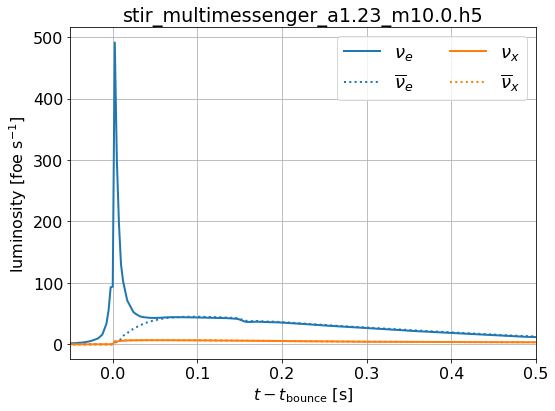

In [6]:
fig = plot_luminosity(model)

## LS220 EOS: 25.0 $M_\odot$, $a=1.23$

In [7]:
ifile = '../../models/Warren_2020/stir_a1.23/stir_multimessenger_a1.23_m25.0.h5'
model = Warren_2020(ifile)

In [8]:
model

**Warren_2020 Model**: stir_multimessenger_a1.23_m25.0.h5

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $25$ $\mathrm{M_{\odot}}$|
|Turb. mixing param. | 1.23|
|EOS | LS220|

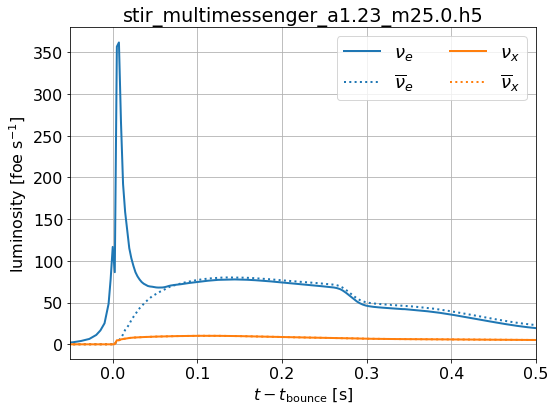

In [9]:
fig = plot_luminosity(model)

## LS220 EOS: 10.0 $M_\odot$, $a=1.27$

In [10]:
ifile = '../../models/Warren_2020/stir_a1.27/stir_multimessenger_a1.27_m10.0.h5'
model = Warren_2020(ifile)

In [11]:
model

**Warren_2020 Model**: stir_multimessenger_a1.27_m10.0.h5

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $10$ $\mathrm{M_{\odot}}$|
|Turb. mixing param. | 1.27|
|EOS | LS220|

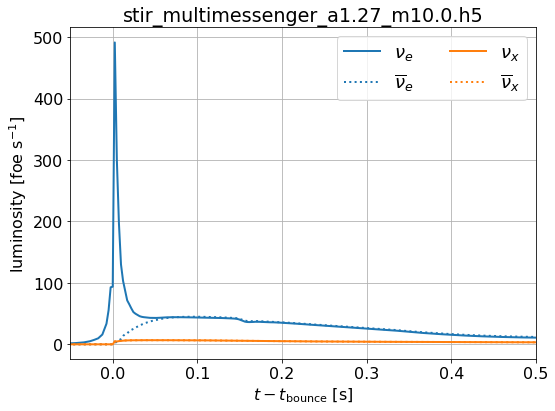

In [12]:
fig = plot_luminosity(model)

## LS220 EOS: 25.0 $M_\odot$, $a=1.27$

In [13]:
ifile = '../../models/Warren_2020/stir_a1.27/stir_multimessenger_a1.27_m25.0.h5'
model = Warren_2020(ifile)

In [14]:
model

**Warren_2020 Model**: stir_multimessenger_a1.27_m25.0.h5

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $25$ $\mathrm{M_{\odot}}$|
|Turb. mixing param. | 1.27|
|EOS | LS220|

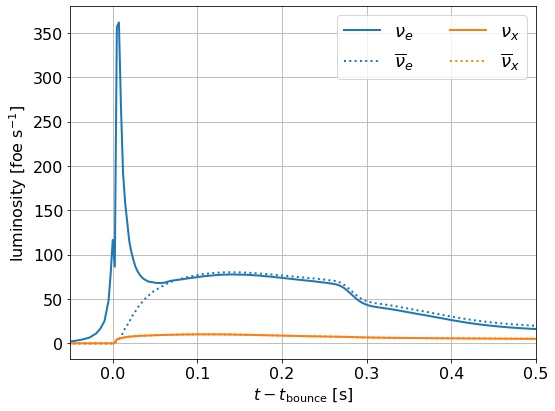

In [15]:
fig, ax = plt.subplots(1, figsize=(8,6))
for flavor in Flavor:

    ax.plot(model.time, model.luminosity[flavor]/1e51, # Report luminosity in units foe/s
            label=flavor.to_tex(),
            color = 'C0' if flavor.is_electron else 'C1',
            ls = '-' if flavor.is_neutrino else ':',
            lw = 2 )

ax.set(xlim=(-0.05, 0.5),
       xlabel=r'$t-t_{\rm bounce}$ [s]',
       ylabel=r'luminosity [foe s$^{-1}$]')
ax.grid()
ax.legend(loc='upper right', ncol=2, fontsize=18)

fig.tight_layout();

## Initial and Oscillated Spectra

Plot the neutrino spectra at the source and after the requested flavor transformation has been applied.

### Adiabatic MSW Flavor Transformation: Normal mass ordering

In [16]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = AdiabaticMSW()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 50*u.ms

ispec = model.get_initial_spectra(t, E)
ospec_nmo = model.get_transformed_spectra(t, E, xform_nmo)

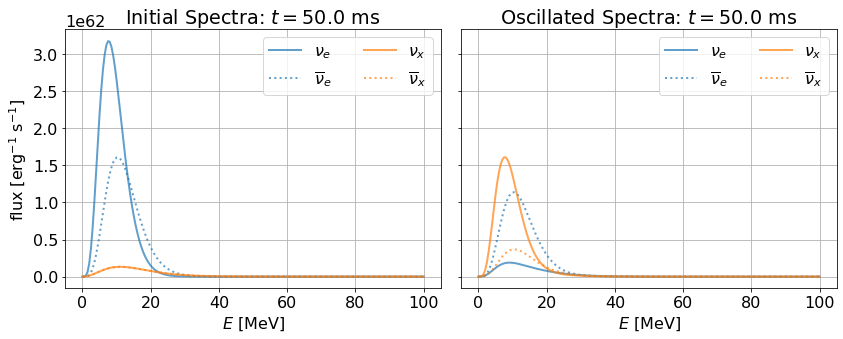

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: $t = ${:.1f}'.format(t))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();